# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

In [1]:
!wget http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
!wget http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip

--2024-04-17 18:35:34--  http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304771808 (291M) [application/zip]
Saving to: ‘Stanford40_JPEGImages.zip’

Stanford40_JPEGImag 100%[===================>] 290.65M  5.82MB/s    in 57s     

2024-04-17 18:36:31 (5.13 MB/s) - ‘Stanford40_JPEGImages.zip’ saved [304771808/304771808]

--2024-04-17 18:36:31--  http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62010 (61K) [application/zip]
Saving to: ‘Stanford40_ImageSplits.zip’

Stanford40_ImageSpl 100%[===================>]  60.56K   121KB/s    in 0.5s    

2024-0

### Unzip it

In [2]:
!unzip Stanford40_JPEGImages.zip -d Stanford40/
!unzip Stanford40_ImageSplits.zip -d Stanford40/

Streaming output truncated to the last 5000 lines.
  inflating: Stanford40/JPEGImages/phoning_213.jpg  
  inflating: Stanford40/JPEGImages/phoning_214.jpg  
  inflating: Stanford40/JPEGImages/phoning_215.jpg  
  inflating: Stanford40/JPEGImages/phoning_216.jpg  
  inflating: Stanford40/JPEGImages/phoning_217.jpg  
  inflating: Stanford40/JPEGImages/phoning_218.jpg  
  inflating: Stanford40/JPEGImages/phoning_219.jpg  
  inflating: Stanford40/JPEGImages/phoning_220.jpg  
  inflating: Stanford40/JPEGImages/phoning_221.jpg  
  inflating: Stanford40/JPEGImages/phoning_222.jpg  
  inflating: Stanford40/JPEGImages/phoning_223.jpg  
  inflating: Stanford40/JPEGImages/phoning_224.jpg  
  inflating: Stanford40/JPEGImages/phoning_225.jpg  
  inflating: Stanford40/JPEGImages/phoning_226.jpg  
  inflating: Stanford40/JPEGImages/phoning_227.jpg  
  inflating: Stanford40/JPEGImages/phoning_228.jpg  
  inflating: Stanford40/JPEGImages/phoning_229.jpg  
  inflating: Stanford40/JPEGImages/phoning_230.j

## Read the train and test splits, combine them and make better splits to help training networks easier.

In [3]:
from collections import Counter
import json
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse",
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1, random_state=0, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')
action_categories_dict = {category: index for index, category in enumerate(action_categories)}
print(action_categories_dict)

Train files (2733):
	['drinking_203.jpg', 'smoking_048.jpg', 'running_099.jpg', 'jumping_186.jpg', 'smoking_205.jpg', 'riding_a_bike_090.jpg', 'climbing_184.jpg', 'throwing_frisby_078.jpg', 'applauding_185.jpg', 'throwing_frisby_131.jpg', 'running_241.jpg', 'riding_a_horse_229.jpg', 'throwing_frisby_009.jpg', 'climbing_126.jpg', 'waving_hands_188.jpg', 'shooting_an_arrow_062.jpg', 'riding_a_horse_191.jpg', 'applauding_087.jpg', 'applauding_074.jpg', 'riding_a_bike_181.jpg', 'running_091.jpg', 'riding_a_bike_188.jpg', 'riding_a_bike_027.jpg', 'throwing_frisby_035.jpg', 'climbing_022.jpg', 'applauding_095.jpg', 'waving_hands_024.jpg', 'running_225.jpg', 'climbing_224.jpg', 'riding_a_bike_108.jpg', 'running_050.jpg', 'jumping_089.jpg', 'pouring_liquid_089.jpg', 'climbing_087.jpg', 'applauding_143.jpg', 'jumping_069.jpg', 'waving_hands_039.jpg', 'smoking_019.jpg', 'drinking_030.jpg', 'running_189.jpg', 'climbing_159.jpg', 'climbing_221.jpg', 'drinking_162.jpg', 'drinking_210.jpg', 'riding_

In [4]:
data_dict_train = {
    "files": train_files,
    "labels": train_labels,
}

data_dict_test = {
    "files": test_files,
    "labels": test_labels,
}


train_labels_numeric = [action_categories_dict[label] for label in train_labels]

test_labels_numeric = [action_categories_dict[label] for label in test_labels]

train_data_list = [{"id_image": file, "label": label} for file, label in zip(train_files, train_labels_numeric)]
test_data_list = [{"id_image": file, "label": label} for file, label in zip(test_files, test_labels_numeric)]

print(train_data_list)
print(test_data_list)

with open('stanfordtrain.json', 'w') as json_file:
    json.dump(train_data_list, json_file)

with open('stanfordtest.json', 'w') as json_file:
    json.dump(test_data_list, json_file)

[{'id_image': 'drinking_203.jpg', 'label': 2}, {'id_image': 'smoking_048.jpg', 'label': 9}, {'id_image': 'running_099.jpg', 'label': 7}, {'id_image': 'jumping_186.jpg', 'label': 3}, {'id_image': 'smoking_205.jpg', 'label': 9}, {'id_image': 'riding_a_bike_090.jpg', 'label': 5}, {'id_image': 'climbing_184.jpg', 'label': 1}, {'id_image': 'throwing_frisby_078.jpg', 'label': 10}, {'id_image': 'applauding_185.jpg', 'label': 0}, {'id_image': 'throwing_frisby_131.jpg', 'label': 10}, {'id_image': 'running_241.jpg', 'label': 7}, {'id_image': 'riding_a_horse_229.jpg', 'label': 6}, {'id_image': 'throwing_frisby_009.jpg', 'label': 10}, {'id_image': 'climbing_126.jpg', 'label': 1}, {'id_image': 'waving_hands_188.jpg', 'label': 11}, {'id_image': 'shooting_an_arrow_062.jpg', 'label': 8}, {'id_image': 'riding_a_horse_191.jpg', 'label': 6}, {'id_image': 'applauding_087.jpg', 'label': 0}, {'id_image': 'applauding_074.jpg', 'label': 0}, {'id_image': 'riding_a_bike_181.jpg', 'label': 5}, {'id_image': 'runn

### Visualize a photo from the training files and also print its label

An image with the label - riding_a_bike


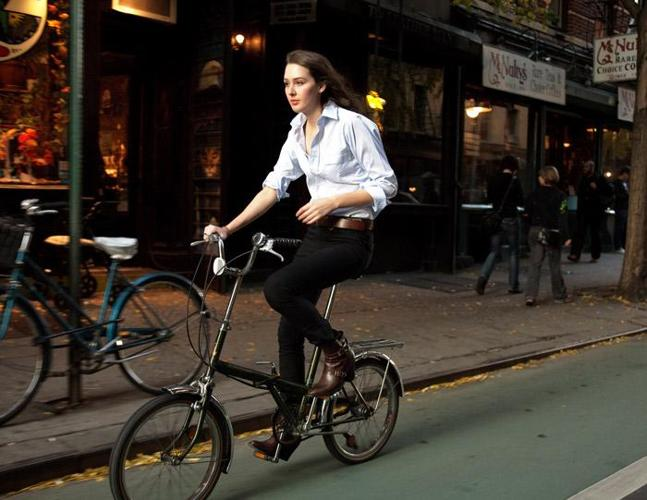

In [5]:
import cv2
from google.colab.patches import cv2_imshow

image_no = 234  # change this to a number between [0, 1200] and you can see a different training image
img = cv2.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
print(f'An image with the label - {train_labels[image_no]}')
cv2_imshow(img)

# Human Motion Database 51 (HMDB51)
### Download the dataset

In [6]:
# Download HMDB51 data and splits from serre lab website
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar

--2024-04-17 18:36:38--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Resolving serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)... 128.148.254.114
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar [following]
--2024-04-17 18:36:39--  https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2124008126 (2.0G)
Saving to: ‘hmdb51_org.rar’

hmdb51_org.rar      100%[===================>]   1.98G  13.6MB/s    in 2m 33s  

2024-04-17 18:39:13 (13.3 MB/s) - ‘hmdb51_org.rar’ saved [2124008126/2124008126]

--2024-04-17 18:39:13--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar
R

# Extract and organize the data.

In [7]:
! mkdir -p video_data test_train_splits
! unrar e test_train_splits.rar test_train_splits
! rm test_train_splits.rar
! unrar e hmdb51_org.rar
! rm hmdb51_org.rar
! mv *.rar video_data
import os
keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse",
        "run", "shoot_bow", "smoke", "throw", "wave"]
for files in os.listdir('video_data'):
    foldername = files.split('.')[0]
    if foldername in keep_hmdb51:
      # extract only the relevant classes for the assignment.
      os.system("mkdir -p video_data/" + foldername)
      os.system("unrar e video_data/"+ files + " video_data/"+foldername)

! rm video_data/*.rar



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from test_train_splits.rar

Extracting  test_train_splits/brush_hair_test_split1.txt                   0%  OK 
Extracting  test_train_splits/brush_hair_test_split2.txt                   1%  OK 
Extracting  test_train_splits/brush_hair_test_split3.txt                   1%  OK 
Extracting  test_train_splits/cartwheel_test_split1.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split2.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split3.txt                    3%  OK 
Extracting  test_train_splits/catch_test_split1.txt                        4%  OK 
Extracting  test_train_splits/catch_test_split2.txt                        4%  OK 
Extracting  test_train_splits/catch_test_split3.txt                        5%  OK 
Extracting  test_train_splits/chew_test_split1.txt       

# Split the dataset into train and test

In [8]:
import glob

TRAIN_TAG, TEST_TAG = 1, 2
train_files_hmdb, test_files_hmdb = [], []
train_labels_hmdb, test_labels_hmdb = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split('/')[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files_hmdb.append(video_filename)
            train_labels_hmdb.append(class_name)
        elif tag == TEST_TAG:
            test_files_hmdb.append(video_filename)
            test_labels_hmdb.append(class_name)

print(f'Train files ({len(train_files_hmdb)}):\n\t{train_files_hmdb}')
print(f'Train labels ({len(train_labels_hmdb)}):\n\t{train_labels_hmdb}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels_hmdb)).items())}\n')
print(f'Test files ({len(test_files_hmdb)}):\n\t{test_files_hmdb}')
print(f'Test labels ({len(test_labels_hmdb)}):\n\t{test_labels_hmdb}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels_hmdb)).items())}\n')
action_categories = sorted(list(set(train_labels_hmdb)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (840):
	['#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_1.avi', 'Boom__Snap__Clap!_(Challenge)_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_2.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_2.

In [9]:
action_categories_dict_hmdb = {category: index for index, category in enumerate(action_categories)}
print(action_categories_dict_hmdb)

{'clap': 0, 'climb': 1, 'drink': 2, 'jump': 3, 'pour': 4, 'ride_bike': 5, 'ride_horse': 6, 'run': 7, 'shoot_bow': 8, 'smoke': 9, 'throw': 10, 'wave': 11}


In [10]:
import cv2

def convertoFrames(video_paths, labels):
    frames = []
    for video_path, label in zip(video_paths, labels):
        big_video_path = os.path.join("video_data", label, str(video_path))

        cap = cv2.VideoCapture(big_video_path)

        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames / 2)

        ret, frame = cap.read()
        if not ret:
            print(f"Error reading frame from video: {video_path}")
            continue

        video_name = os.path.splitext(os.path.basename(video_path))[0]
        image_name = f"{video_name}.jpg"
        output_dir = "image_data"


        output_path = os.path.join(output_dir, label ,image_name)
        os.makedirs(os.path.join(output_dir, label), exist_ok=True)

        cv2.imwrite(output_path, frame)


        frames.append(frame)
        cap.release()

    return frames

In [11]:
convertoFrames(train_files_hmdb, train_labels_hmdb)
convertoFrames(test_files_hmdb, test_labels_hmdb)

data_dict_train = {
    "files": train_files_hmdb,
    "labels": train_labels_hmdb,
}

data_dict_test = {
    "files": test_files_hmdb,
    "labels": test_labels_hmdb,
}


train_labels_numeric = [action_categories_dict_hmdb[label] for label in train_labels_hmdb]

test_labels_numeric = [action_categories_dict_hmdb[label] for label in test_labels_hmdb]

train_data_list = [{"id_image": file, "label": label} for file, label in zip(train_files_hmdb, train_labels_numeric)]
test_data_list = [{"id_image": file, "label": label} for file, label in zip(test_files_hmdb, test_labels_numeric)]

print(train_data_list)
print(test_data_list)

with open('hmdbtrain.json', 'w') as json_file:
    json.dump(train_data_list, json_file)

with open('hmdbtest.json', 'w') as json_file:
    json.dump(test_data_list, json_file)

[{'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_1

In [12]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchsummary
import json
from PIL import Image

class Dataset(Dataset):

    def __init__(self, json_filename, stanford, transform=None):
        """
        Arguments:
            json_filename (string): Json file with images paths and labels.
            transform (callable, optional): Optional transform to be applied.
        """
        self.data_list = []
        with open(json_filename, 'r') as file:
          loaded_list = json.load(file)
          print(json_filename)
          print(loaded_list)
          self.data_list.extend(loaded_list)
        self.transform = transform
        self.json_filename = json_filename
        self.stanford= stanford

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
      label = self.data_list[idx]['label']
      image_aux = self.data_list[idx]['id_image']


      if self.stanford == True:
        directoryone = "Stanford40"
        directorytwo = "JPEGImages"
        img_path =  os.path.join(directoryone, directorytwo, image_aux )
      else: #hmdb
        directoryone = "image_data"
        subdirectories = os.listdir(directoryone)
        subdirectories = [subdir for subdir in subdirectories if subdir != '.ipynb_checkpoints']
        subdirectories.sort()

        #print(subdirectories)
        directorytwo= str(subdirectories[label])
        #print(directorytwo)
        image_aux = image_aux[:-4] + ".jpg"

        img_path =  os.path.join(directoryone, directorytwo, image_aux )

      image = Image.open(img_path)
      if self.transform:
        image = self.transform(image)

      return image, label


# Transforming the image in getitem
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.RandomCrop((224,224))
    transforms.Grayscale(num_output_channels=3), # 28x28x1
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [13]:
from torch.utils.data import random_split

def create_data_loaders(train_json, test_json, transform, stanford, batch_size):
    train_dataset = Dataset(train_json, stanford, transform)
    test_dataset = Dataset(test_json, stanford, transform)

    train_size = int(0.9 * len(train_dataset))
    val_size = len(train_dataset) - train_size

    print("Train size: ", train_size, "\nValidation size: ", val_size, "\nTest size: ", len(test_dataset))

    new_train_dataset, new_val_dataset = random_split(train_dataset, [train_size, val_size])

    train_loader = DataLoader(new_train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(new_val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    return train_loader, val_loader, test_loader


In [14]:
train_loader_stanford, val_loader_stanford, test_loader_stanford = create_data_loaders("stanfordtrain.json", "stanfordtest.json",  transform, True, batch_size=32)

stanfordtrain.json
[{'id_image': 'drinking_203.jpg', 'label': 2}, {'id_image': 'smoking_048.jpg', 'label': 9}, {'id_image': 'running_099.jpg', 'label': 7}, {'id_image': 'jumping_186.jpg', 'label': 3}, {'id_image': 'smoking_205.jpg', 'label': 9}, {'id_image': 'riding_a_bike_090.jpg', 'label': 5}, {'id_image': 'climbing_184.jpg', 'label': 1}, {'id_image': 'throwing_frisby_078.jpg', 'label': 10}, {'id_image': 'applauding_185.jpg', 'label': 0}, {'id_image': 'throwing_frisby_131.jpg', 'label': 10}, {'id_image': 'running_241.jpg', 'label': 7}, {'id_image': 'riding_a_horse_229.jpg', 'label': 6}, {'id_image': 'throwing_frisby_009.jpg', 'label': 10}, {'id_image': 'climbing_126.jpg', 'label': 1}, {'id_image': 'waving_hands_188.jpg', 'label': 11}, {'id_image': 'shooting_an_arrow_062.jpg', 'label': 8}, {'id_image': 'riding_a_horse_191.jpg', 'label': 6}, {'id_image': 'applauding_087.jpg', 'label': 0}, {'id_image': 'applauding_074.jpg', 'label': 0}, {'id_image': 'riding_a_bike_181.jpg', 'label': 5},

In [15]:
train_loader_hmdb, val_loader_hmdb, test_loader_hmdb = create_data_loaders("hmdbtrain.json", "hmdbtest.json", transform, False,  batch_size=32)

hmdbtrain.json
[{'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_

In [16]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train(model, device, train_loader, optimizer, criterion, epochs = 5):
  training_loss = 0.0

  model.train()
  correct, total = 0, 0
  for batch_idx, (images, labels) in enumerate(train_loader):

      images = images.to(device)
      labels = labels.to(device)
      # Forward Pass
      output = model(images)
      loss = criterion(output, labels)

      # Backward Pass
      loss.backward()
      optimizer.step() # updates model parameters using gradient computings by back propagation and applies the optimization algo
      optimizer.zero_grad()


      _, predicted = output.max(1)
      total += labels.size(0)
      correct += predicted.eq(labels).sum().item()

      training_loss += loss.item()
      if batch_idx % 100 == 99:
          print(f'Batch {batch_idx+1}/{len(train_loader)}, Loss: {loss.item()}')

  training_accuracy = 100 * correct / total
  average_training_loss = training_loss / len(train_loader)
  print(f"Train accuracy: {training_accuracy} %, Average Loss: {average_training_loss}")
  return training_accuracy, average_training_loss


def test(data_loader, model, loss_fn, type_test):
  with torch.no_grad():
      correct, total , loss = 0, 0, 0
      num_batches = len(data_loader)
      model.eval()
      for images, labels in data_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          loss += loss_fn(outputs, labels.long() ).item()

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  loss /= num_batches
  accuracy = 100*correct/total
  print(f"{type_test} accuracy: {accuracy} %, Average Loss: {loss}")
  return accuracy, loss

# Best model for Stanford: Resnet

In [17]:
from torchvision.models import mobilenet_v2, resnet18, AlexNet
from torchvision.models.efficientnet import EfficientNet
import torchvision.models as models

alex = AlexNet(num_classes=len(action_categories))
alex.to(device)

efficientnet_model = models.efficientnet_b0(num_classes=len(action_categories))
efficientnet_model.to(device)

mobilenet_model = mobilenet_v2(pretrained=False)
mobilenet_model.to(device)

resnet_model = resnet18(pretrained=False)
resnet_model.to(device)

#optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

optimizer_alex =  optim.Adam(alex.parameters(), lr=0.003)
optimizer_eff = optim.Adam(efficientnet_model.parameters(), lr=0.001)
mobilenet_optimizer = optim.Adam(mobilenet_model.parameters(), lr=0.003)
resnet_optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)
# All of this model were attempted for Stanford database. However, the best one is resnet, and it is the one that we use

optimizers = [resnet_optimizer]
models = [resnet_model]

criterion = nn.CrossEntropyLoss()




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [18]:
torchsummary.summary(resnet_model, input_size=(3,224 , 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

# Cyclic Learning Rate

In [19]:
from torch.optim.lr_scheduler import CyclicLR

resnet_model_2 = resnet18(pretrained=False)
resnet_model_2.to(device)

resnet_optimizer_2 = optim.Adam(resnet_model_2.parameters(), lr=0.001)
# 77 iterations per epoch x 30 epochs / (2 (half cycle) * 3 complete cylces in 3 epochs) = 385
step_size = 385 # With 385 step size we will have 3 complete cycles in the 30 epochs
base_lr = 0.001  # Minimum learning rate
max_lr = 0.01  # Maximum learning rate
scheduler_2 = CyclicLR(resnet_optimizer_2, base_lr=base_lr, max_lr=max_lr, step_size_up=step_size, cycle_momentum=False)
optimizers.append(resnet_optimizer_2)
models.append(resnet_model_2)

# Pretrained model (Resnet) for HMDB

In [20]:
trained_resnet_model = resnet18(pretrained=True)

num_ftrs = trained_resnet_model.fc.in_features
trained_resnet_model.fc = nn.Linear(num_ftrs, 12)
trained_resnet_model.to(device)

trained_resnet_optimizer = optim.Adam(trained_resnet_model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]


In [21]:
torchsummary.summary(trained_resnet_model, input_size=(3,224 , 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [22]:
def run (models, optimizers, criterion, device, train_loader, val_loader, epochs = 30):
  models_results = []
  for model, optimizer in zip(models, optimizers):
    training_losses = []
    validation_losses = []
    training_accuracies = []
    validation_accuracies = []
    print("Model: ", type(model).__name__)
    for t in range(epochs):
      print(f"Epoch {t+1}\n---------------------")
      training_accuracy, training_loss = train(model, device, train_loader, optimizer, criterion)
      validation_accuracy, validation_loss = test(val_loader, model, criterion, "Validation")
      training_losses.append(training_loss)
      training_accuracies.append(training_accuracy)
      validation_accuracies.append(validation_accuracy)
      validation_losses.append(validation_loss)
    models_results.append([training_losses, training_accuracies, validation_losses, validation_accuracies])
  return models_results

In [23]:
def run_model (model, optimizer, criterion, device, train_loader, val_loader, epochs = 30):
  model_result = []
  training_losses = []
  validation_losses = []
  training_accuracies = []
  validation_accuracies = []
  print("Model: ", type(model).__name__)
  for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------")
    training_accuracy, training_loss = train(model, device, train_loader, optimizer, criterion)
    validation_accuracy, validation_loss = test(val_loader, model, criterion, "Validation")
    training_losses.append(training_loss)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    validation_losses.append(validation_loss)
  model_result.append([training_losses, training_accuracies, validation_losses, validation_accuracies])
  return model_result

In [24]:
model_results_hmdb = run_model(trained_resnet_model, trained_resnet_optimizer, criterion, device, train_loader_hmdb, val_loader_hmdb,25)

Model:  ResNet
Epoch 1
---------------------
Train accuracy: 16.798941798941797 %, Average Loss: 2.620718459288279
Validation accuracy: 8.333333333333334 %, Average Loss: 9.371033350626627
Epoch 2
---------------------
Train accuracy: 19.444444444444443 %, Average Loss: 2.397294372320175
Validation accuracy: 13.095238095238095 %, Average Loss: 2.586087783177694
Epoch 3
---------------------
Train accuracy: 23.80952380952381 %, Average Loss: 2.2260742783546448
Validation accuracy: 36.904761904761905 %, Average Loss: 2.0207954247792563
Epoch 4
---------------------
Train accuracy: 30.026455026455025 %, Average Loss: 2.054147551457087
Validation accuracy: 23.80952380952381 %, Average Loss: 3.2859198252360025
Epoch 5
---------------------
Train accuracy: 31.21693121693122 %, Average Loss: 1.996999482313792
Validation accuracy: 23.80952380952381 %, Average Loss: 2.734713395436605
Epoch 6
---------------------
Train accuracy: 36.24338624338624 %, Average Loss: 1.8868976086378098
Validation a

In [25]:
models_results_stanford = run(models, optimizers, criterion, device, train_loader_stanford, val_loader_stanford)

Model:  ResNet
Epoch 1
---------------------
Train accuracy: 19.31679544530297 %, Average Loss: 2.546830222204134
Validation accuracy: 17.153284671532848 %, Average Loss: 2.3702146212259927
Epoch 2
---------------------
Train accuracy: 26.962179747864987 %, Average Loss: 2.082564649643836
Validation accuracy: 17.51824817518248 %, Average Loss: 3.4204219977060952
Epoch 3
---------------------
Train accuracy: 31.882879219194795 %, Average Loss: 1.9194233680700328
Validation accuracy: 36.496350364963504 %, Average Loss: 1.883576340145535
Epoch 4
---------------------
Train accuracy: 37.33224888165921 %, Average Loss: 1.8097140881922338
Validation accuracy: 28.1021897810219 %, Average Loss: 2.104415933291117
Epoch 5
---------------------
Train accuracy: 40.54493696624644 %, Average Loss: 1.680987762166308
Validation accuracy: 29.562043795620436 %, Average Loss: 2.2591566244761148
Epoch 6
---------------------
Train accuracy: 44.12362749084994 %, Average Loss: 1.6149110407024234
Validation 

In [26]:
import matplotlib.pyplot as plt
def plot_losses(models_results):
    min_loss = float('inf')
    max_loss = float('-inf')

    for i, result in enumerate(models_results):
        _, _, validation_losses, _ = result
        min_loss = min(min_loss, min(validation_losses))
        max_loss = max(max_loss, max(validation_losses))

    for i, result in enumerate(models_results):
        model_name = type(models[i]).__name__
        training_losses, _, validation_losses, _ = result

        plt.figure()

        plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss')
        plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss')

        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{model_name} Training and Validation Losses per Epoch')
        plt.legend()
        plt.ylim(min_loss, max_loss)
        plt.show()



In [27]:
def plot_accuracies(models_results):
    min_accuracy = float('inf')
    max_accuracy = float('-inf')

    for i, result in enumerate(models_results):
        _, training_accuracies, _, validation_accuracies = result
        min_accuracy = min(min_accuracy, min(training_accuracies), min(validation_accuracies))
        max_accuracy = max(max_accuracy, max(training_accuracies), max(validation_accuracies))

    for i, result in enumerate(models_results):
        model_name = type(models[i]).__name__
        training_accuracies, validation_accuracies = result[1], result[3]

        plt.figure()

        plt.plot(range(1, len(training_accuracies) + 1), training_accuracies, label='Training Accuracy')
        plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, label='Validation Accuracy')

        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'{model_name} Training and Validation Accuracies per Epoch')
        plt.legend()
        plt.ylim(min_accuracy, max_accuracy)  # Set the y-axis limits for consistency
        plt.show()

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def test_with_predictions(data_loader, model, loss_fn, device):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_predictions

def create_confusion_matrix(true_labels, predicted_labels, title):
  cm = confusion_matrix(true_labels, predicted_labels)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
              xticklabels=action_categories, yticklabels=action_categories)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()


# Stanford Results

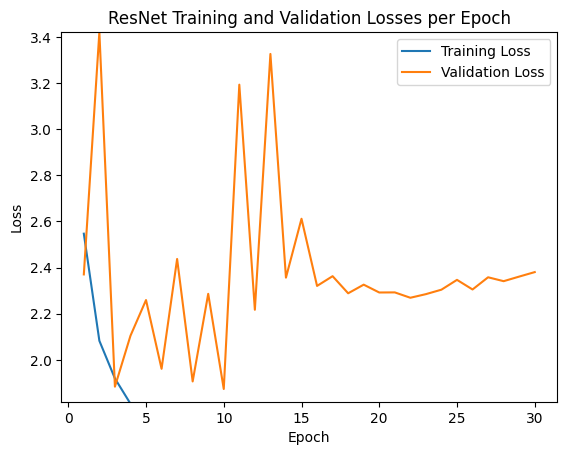

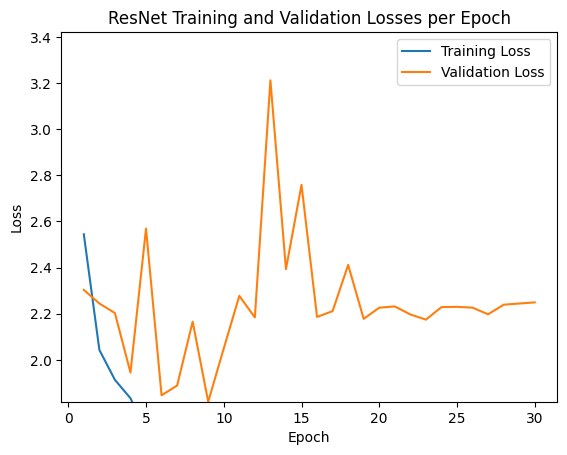

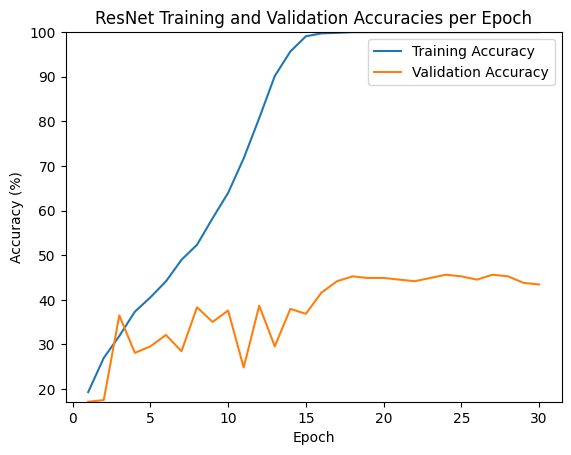

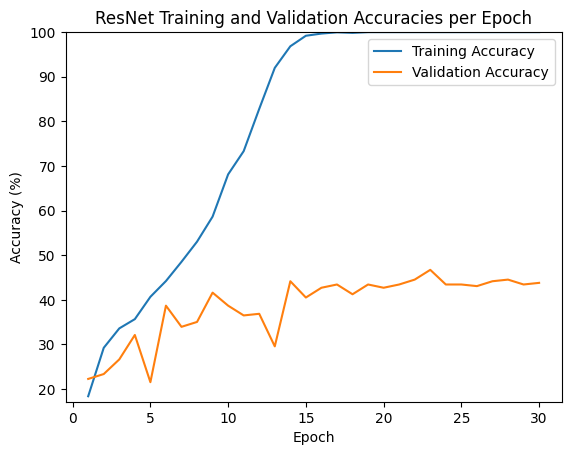

In [29]:
plot_losses(models_results_stanford)
plot_accuracies(models_results_stanford)

In [30]:
print("Resnet Test Accuracy")
final_resnet  = models[0]
_, _ = test(test_loader_stanford, final_resnet, criterion, "Test")

Resnet Test Accuracy
Test accuracy: 42.76315789473684 %, Average Loss: 2.533820295333862


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

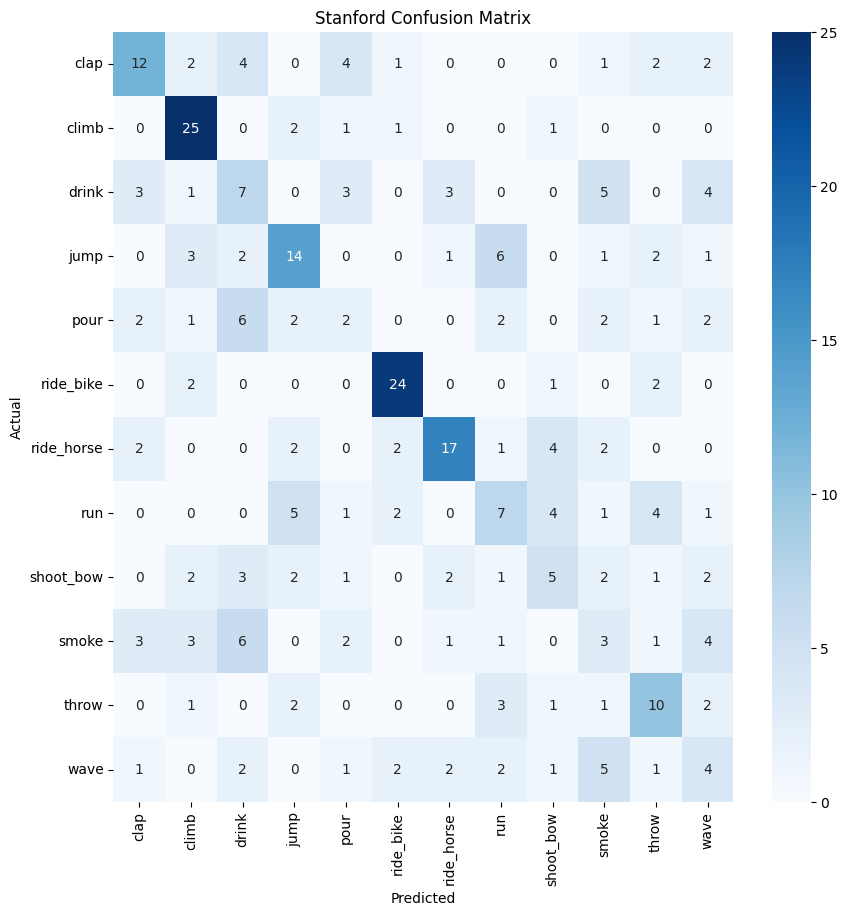

In [31]:
true_labels_stanford, predicted_labels_stanford = test_with_predictions(test_loader_stanford, final_resnet, criterion, device)
create_confusion_matrix(true_labels_stanford, predicted_labels_stanford, "Stanford Confusion Matrix")

# HMDB Results

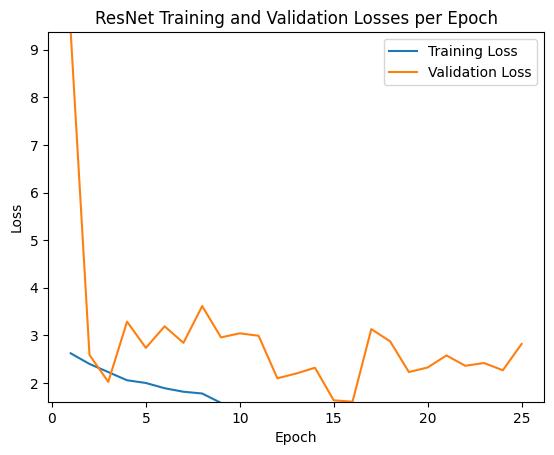

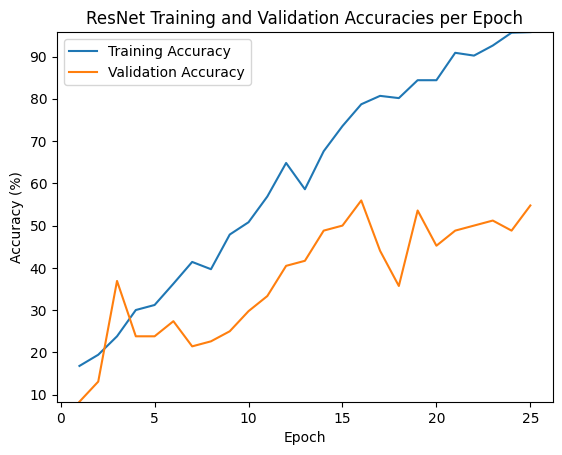

In [32]:
plot_losses(model_results_hmdb)
plot_accuracies(model_results_hmdb)

In [33]:
print("Resnet for HMDB")
_, _ = test(test_loader_hmdb, trained_resnet_model, criterion, "Test")

Resnet for HMDB
Test accuracy: 30.0 %, Average Loss: 3.9197245935599008


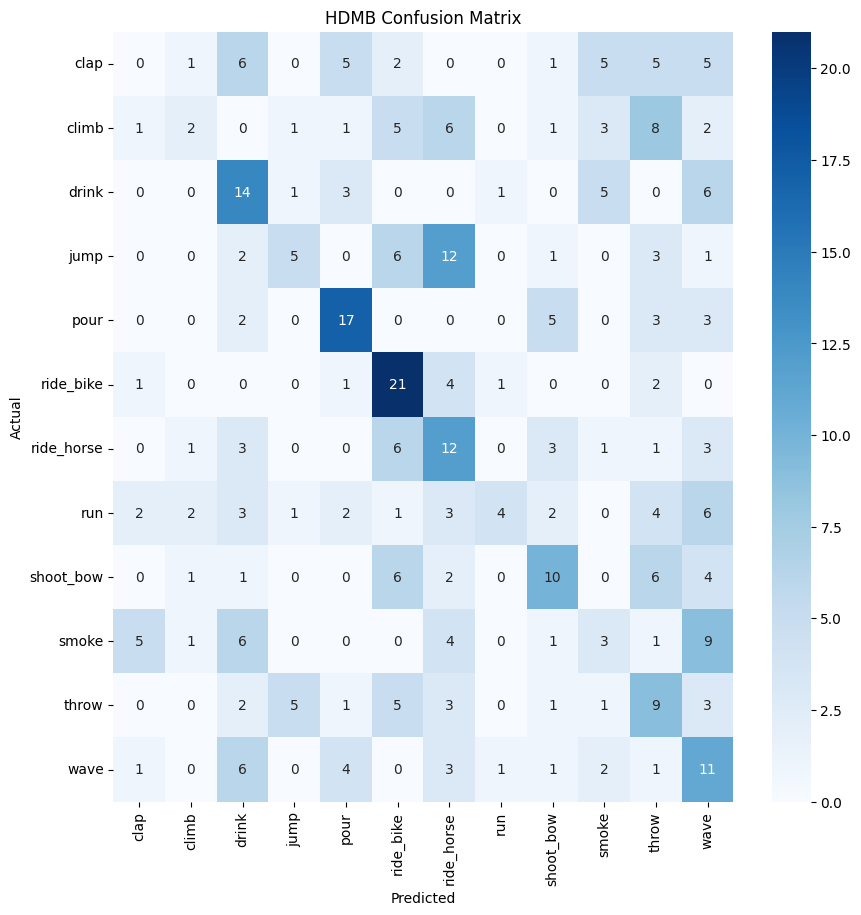

In [34]:
true_labels_hmdb, predicted_labels_hmdb = test_with_predictions(test_loader_hmdb, trained_resnet_model, criterion, device)
create_confusion_matrix(true_labels_hmdb, predicted_labels_hmdb, "HDMB Confusion Matrix")

# Data Augmentation for Stanford

In [35]:
data_aug_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.05),
    transforms.RandomRotation(degrees=10),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [36]:
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision import transforms

def create_data_loaders_aug(train_json, test_json, augment_transform, transform, stanford, batch_size):
    train_dataset = Dataset(train_json, stanford, transform)
    test_dataset = Dataset(test_json, stanford, transform)

    train_dataset_aug = Dataset(train_json, stanford, augment_transform)

    combined_train_dataset = ConcatDataset([train_dataset, train_dataset_aug])

    train_size = int(0.9 * len(combined_train_dataset))
    val_size = len(combined_train_dataset) - train_size

    print("Train size: ", train_size, "\nValidation size: ", val_size, "\nTest size: ", len(test_dataset))

    new_train_dataset, new_val_dataset = random_split(combined_train_dataset, [train_size, val_size])

    train_loader = DataLoader(new_train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(new_val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, val_loader, test_loader

In [37]:
data_aug_train_loader_stanford, data_aug_val_loader_stanford, data_aug_test_loader_stanford = create_data_loaders_aug("stanfordtrain.json", "stanfordtest.json",  data_aug_transform, transform,True, batch_size=32)

stanfordtrain.json
[{'id_image': 'drinking_203.jpg', 'label': 2}, {'id_image': 'smoking_048.jpg', 'label': 9}, {'id_image': 'running_099.jpg', 'label': 7}, {'id_image': 'jumping_186.jpg', 'label': 3}, {'id_image': 'smoking_205.jpg', 'label': 9}, {'id_image': 'riding_a_bike_090.jpg', 'label': 5}, {'id_image': 'climbing_184.jpg', 'label': 1}, {'id_image': 'throwing_frisby_078.jpg', 'label': 10}, {'id_image': 'applauding_185.jpg', 'label': 0}, {'id_image': 'throwing_frisby_131.jpg', 'label': 10}, {'id_image': 'running_241.jpg', 'label': 7}, {'id_image': 'riding_a_horse_229.jpg', 'label': 6}, {'id_image': 'throwing_frisby_009.jpg', 'label': 10}, {'id_image': 'climbing_126.jpg', 'label': 1}, {'id_image': 'waving_hands_188.jpg', 'label': 11}, {'id_image': 'shooting_an_arrow_062.jpg', 'label': 8}, {'id_image': 'riding_a_horse_191.jpg', 'label': 6}, {'id_image': 'applauding_087.jpg', 'label': 0}, {'id_image': 'applauding_074.jpg', 'label': 0}, {'id_image': 'riding_a_bike_181.jpg', 'label': 5},

In [38]:
resnet_model = resnet18(pretrained=False)
resnet_model.to(device)
resnet_optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [39]:
model_result = run_model(resnet_model, resnet_optimizer, criterion, device, data_aug_train_loader_stanford, data_aug_val_loader_stanford)

Model:  ResNet
Epoch 1
---------------------
Batch 100/154, Loss: 2.4181315898895264
Train accuracy: 17.767838991664973 %, Average Loss: 2.498431690327533
Validation accuracy: 21.02376599634369 %, Average Loss: 2.454782393243578
Epoch 2
---------------------
Batch 100/154, Loss: 2.1709864139556885
Train accuracy: 25.96056108965237 %, Average Loss: 2.123329065062783
Validation accuracy: 23.948811700182816 %, Average Loss: 2.259857932726542
Epoch 3
---------------------
Batch 100/154, Loss: 2.063922643661499
Train accuracy: 31.754421630412686 %, Average Loss: 1.9544633967535836
Validation accuracy: 28.884826325411336 %, Average Loss: 1.97148859500885
Epoch 4
---------------------
Batch 100/154, Loss: 1.9979971647262573
Train accuracy: 37.81256352917259 %, Average Loss: 1.8004861032807982
Validation accuracy: 26.325411334552104 %, Average Loss: 2.24903843137953
Epoch 5
---------------------
Batch 100/154, Loss: 1.685080647468567
Train accuracy: 41.18723317747509 %, Average Loss: 1.6941417

In [40]:
print("Resnet")
_, _ = test(data_aug_test_loader_stanford, resnet_model, criterion, "Test")

Resnet
Test accuracy: 45.723684210526315 %, Average Loss: 2.7261916637420653


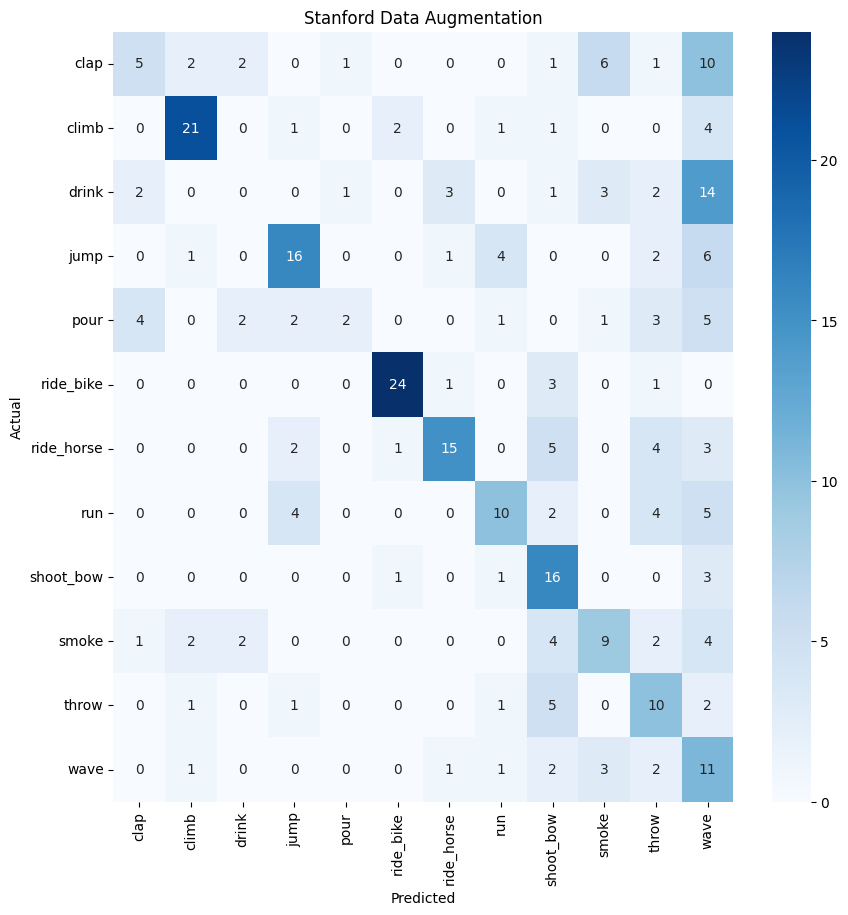

In [41]:
das40_true_labels, das40_predicted_labels = test_with_predictions(data_aug_test_loader_stanford, resnet_model, criterion, device)
create_confusion_matrix(das40_true_labels, das40_predicted_labels, "Stanford Data Augmentation")

# Data Augmentation for HMDB51

In [42]:
data_aug_train_loader_hmdb, data_aug_val_loader_hmdb, data_aug_test_loader_hmdb = create_data_loaders_aug("hmdbtrain.json", "hmdbtest.json", data_aug_transform, transform, False, batch_size=32)

hmdbtrain.json
[{'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_

In [43]:
trained_resnet_model = resnet18(pretrained=True)
trained_resnet_model.to(device)
trained_resnet_optimizer = optim.Adam(trained_resnet_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [44]:
model_result_hmdb51 = run_model(trained_resnet_model, trained_resnet_optimizer, criterion, device, data_aug_train_loader_hmdb, data_aug_val_loader_hmdb, 25)

Model:  ResNet
Epoch 1
---------------------
Train accuracy: 35.51587301587302 %, Average Loss: 2.8293390423059464
Validation accuracy: 41.666666666666664 %, Average Loss: 1.7347524762153625
Epoch 2
---------------------
Train accuracy: 63.095238095238095 %, Average Loss: 1.1150748295088608
Validation accuracy: 63.69047619047619 %, Average Loss: 1.0816252529621124
Epoch 3
---------------------
Train accuracy: 72.94973544973546 %, Average Loss: 0.7785333407421907
Validation accuracy: 67.85714285714286 %, Average Loss: 1.0968449811140697
Epoch 4
---------------------
Train accuracy: 78.96825396825396 %, Average Loss: 0.6349860318005085
Validation accuracy: 68.45238095238095 %, Average Loss: 1.2240516444047291
Epoch 5
---------------------
Train accuracy: 83.86243386243386 %, Average Loss: 0.5139815816655755
Validation accuracy: 60.714285714285715 %, Average Loss: 1.3178372979164124
Epoch 6
---------------------
Train accuracy: 88.42592592592592 %, Average Loss: 0.3854847392067313
Validat

In [45]:
print("Resnet Data Augmentation for HMDB")
_, _ = test(data_aug_test_loader_hmdb, trained_resnet_model, criterion, "Test")

Resnet Data Augmentation for HMDB
Test accuracy: 41.388888888888886 %, Average Loss: 2.6399398148059845


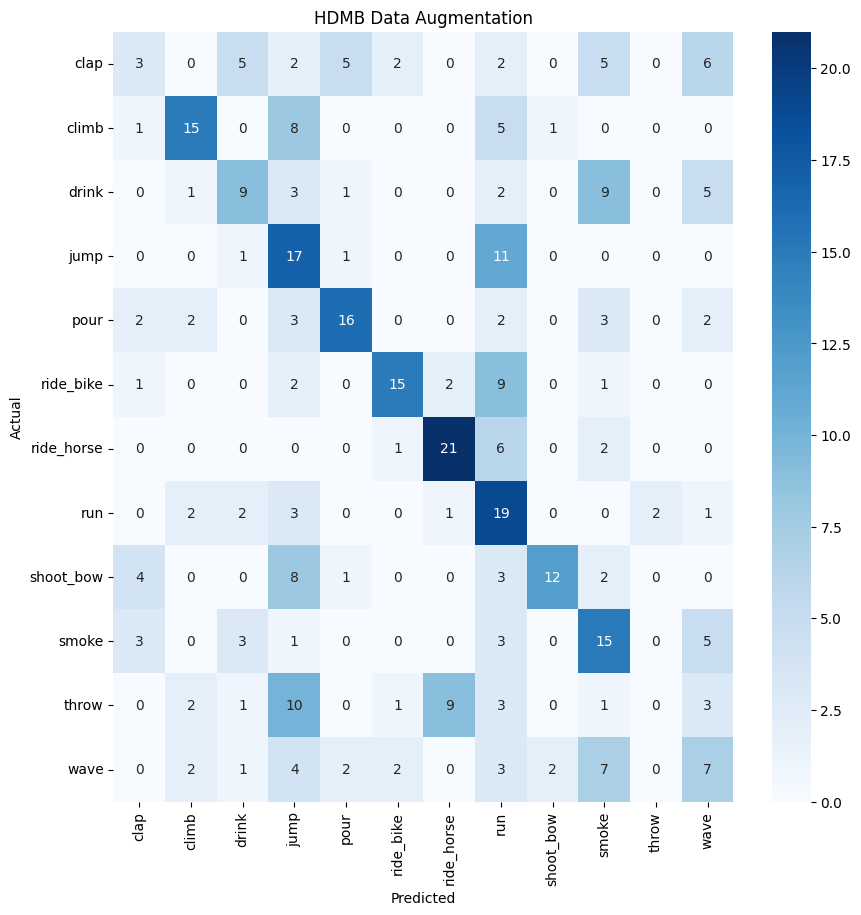

In [46]:
da_hmdb51_true_labels, da_hmdb51_predicted_labels = test_with_predictions(data_aug_test_loader_hmdb, trained_resnet_model, criterion, device)
create_confusion_matrix(da_hmdb51_true_labels, da_hmdb51_predicted_labels, "HDMB Data Augmentation")

# Task 3: HMDB51 Optical Flow

In [59]:
import numpy as np

def extract_optical_flow(video_path, output_dir, num_frames=16):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    flow_frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        prev_gray = gray
        flow_frames.append(flow)

    cap.release()

    # Select 'num_frames' evenly spaced frames
    indices = np.linspace(0, len(flow_frames) - 1, num_frames).astype(np.int32)
    selected_flows = [flow_frames[i] for i in indices]

    # Save flow frames
    for i, flow in enumerate(selected_flows):
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hsv = np.zeros((prev_frame.shape[0], prev_frame.shape[1], 3), dtype=np.uint8)
        hsv[..., 0] = ang * 180 / np.pi / 2
        hsv[..., 1] = 255
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        cv2.imwrite(os.path.join(output_dir, f"flow_{i}.png"), rgb)

In [60]:
class OpticalFlowDataset(Dataset):
    def __init__(self, json_filename, transform=None):
        with open(json_filename, 'r') as file:
            self.data_list = json.load(file)
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        label = self.data_list[idx]['label']
        image_aux = self.data_list[idx]['id_image']
        flow_images = []
        directoryone = "image_data"
        subdirectories = os.listdir(directoryone)
        subdirectories = [subdir for subdir in subdirectories if subdir != '.ipynb_checkpoints']
        subdirectories.sort()
        directorytwo= str(subdirectories[label])
        image_aux = image_aux[:-4] + ".jpg"
        for i in range(16):  # 16 flow images per video
            image_path = os.path.join(directoryone, directorytwo, image_aux)
            image = Image.open(image_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
            flow_images.append(image)

        # Correctly stack the flow images along the channel dimension
        flow_images = torch.cat(flow_images, dim=0)  # Concatenate along the channel dimension
        return flow_images, label

In [61]:
def create_data_loaders_optical_flow(train_json, test_json, transform, batch_size):
    train_dataset = OpticalFlowDataset(train_json, transform)
    test_dataset = OpticalFlowDataset(test_json, transform)

    train_dataset= OpticalFlowDataset(train_json, transform)


    train_size = int(0.9 * len(train_dataset))
    val_size = len(train_dataset) - train_size

    print("Train size: ", train_size, "\nValidation size: ", val_size, "\nTest size: ", len(test_dataset))

    new_train_dataset, new_val_dataset = random_split(train_dataset, [train_size, val_size])

    train_loader = DataLoader(new_train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(new_val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, val_loader, test_loader

In [63]:
import torchvision.models as models

optical_flow_modela = models.resnet18(pretrained=False)
optical_flow_modelb = models.resnet34(pretrained=False)
optical_flow_modelc = models.resnet50(pretrained=False)
optical_flow_modeld = models.resnet101(pretrained=False)

optical_flow_modela.conv1 = nn.Conv2d(16 * 3, 64, kernel_size=7, stride=2, padding=3, bias=False)
optical_flow_modelb.conv1 = nn.Conv2d(16 * 3, 64, kernel_size=7, stride=2, padding=3, bias=False)
optical_flow_modelc.conv1 = nn.Conv2d(16 * 3, 64, kernel_size=7, stride=2, padding=3, bias=False)
optical_flow_modeld.conv1 = nn.Conv2d(16 * 3, 64, kernel_size=7, stride=2, padding=3, bias=False)

optical_flow_modela.to(device)
optical_flow_modelb.to(device)
optical_flow_modelc.to(device)
optical_flow_modeld.to(device)


optical_flow_optimizera = optim.Adam(optical_flow_modela.parameters(), lr=0.0015)
optical_flow_optimizerb = optim.Adam(optical_flow_modelb.parameters(), lr=0.0015)
optical_flow_optimizerc = optim.Adam(optical_flow_modelc.parameters(), lr=0.0015)
optical_flow_optimizerd = optim.Adam(optical_flow_modeld.parameters(), lr=0.003)

optical_flow_models = [optical_flow_modela, optical_flow_modelb, optical_flow_modelc]
optical_flow_optimizers = [optical_flow_optimizera, optical_flow_optimizerb, optical_flow_optimizerc]


criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [64]:
optical_flow_train_loader_hmdb, optical_flow_val_loader_hmdb, optical_flow_test_loader_hmdb = create_data_loaders_optical_flow("hmdbtrain.json", "hmdbtest.json", transform, batch_size=32)

Train size:  756 
Validation size:  84 
Test size:  360


In [65]:
torchsummary.summary(optical_flow_models[0], input_size=(48,224 , 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]         150,528
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [66]:
optical_flow_model_result = run_model(optical_flow_models[0], optical_flow_optimizers[0], criterion, device, optical_flow_train_loader_hmdb, optical_flow_val_loader_hmdb, 25)

Model:  ResNet
Epoch 1
---------------------
Train accuracy: 14.285714285714286 %, Average Loss: 3.060458501180013
Validation accuracy: 9.523809523809524 %, Average Loss: 5.262216567993164
Epoch 2
---------------------
Train accuracy: 23.14814814814815 %, Average Loss: 2.2049722224473953
Validation accuracy: 11.904761904761905 %, Average Loss: 6.2611033121744795
Epoch 3
---------------------
Train accuracy: 30.423280423280424 %, Average Loss: 2.0155155609051385
Validation accuracy: 15.476190476190476 %, Average Loss: 3.0660703976949057
Epoch 4
---------------------
Train accuracy: 36.24338624338624 %, Average Loss: 1.921401063601176
Validation accuracy: 20.238095238095237 %, Average Loss: 2.4634655316670737
Epoch 5
---------------------
Train accuracy: 41.26984126984127 %, Average Loss: 1.777190774679184
Validation accuracy: 21.428571428571427 %, Average Loss: 2.7492516040802
Epoch 6
---------------------
Train accuracy: 40.07936507936508 %, Average Loss: 1.7422364850838978
Validation 

In [67]:
print("Resnet for Optical Flow")
model = optical_flow_models[0]
_, _ = test(optical_flow_test_loader_hmdb, model, criterion, "Test")

Resnet for Optical Flow
Test accuracy: 25.555555555555557 %, Average Loss: 3.529154231150945


In [91]:
def plot_losses_optical(models_results):
    min_loss = float('inf')
    max_loss = float('-inf')

    for i, result in enumerate(models_results):
        _, _, validation_losses, _ = result
        min_loss = min(min_loss, min(validation_losses))
        max_loss = max(max_loss, max(validation_losses))

    for i, result in enumerate(models_results):
        model_name = type(models[i]).__name__
        training_losses, _, validation_losses, _ = result

        plt.figure()

        plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss')
        plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss')

        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{model_name} Training and Validation Losses per Epoch')
        plt.legend()
        plt.ylim(min_loss, max_loss)
        plt.show()


In [74]:
def plot_accuracies_optical(models, models_results):

    min_accuracy = 100
    max_accuracy = 0

    for result in models_results:
        _, training_accuracies, _, validation_accuracies = result
        min_accuracy = min(min_accuracy, min(training_accuracies), min(validation_accuracies))
        max_accuracy = max(max_accuracy, max(training_accuracies), max(validation_accuracies))

    for model, result in zip(models, models_results):
        model_name = type(model).__name__
        training_accuracies, validation_accuracies = result[1], result[3]

        plt.figure(figsize=(10, 5))

        plt.plot(range(1, len(training_accuracies) + 1), training_accuracies, 'b-', label='Training Accuracy')
        plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, 'r-', label='Validation Accuracy')

        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'{model_name} Training and Validation Accuracies')
        plt.legend()
        plt.ylim([min_accuracy * 0.95, max_accuracy * 1.05])  # Give a bit of margin to min and max
        plt.show()

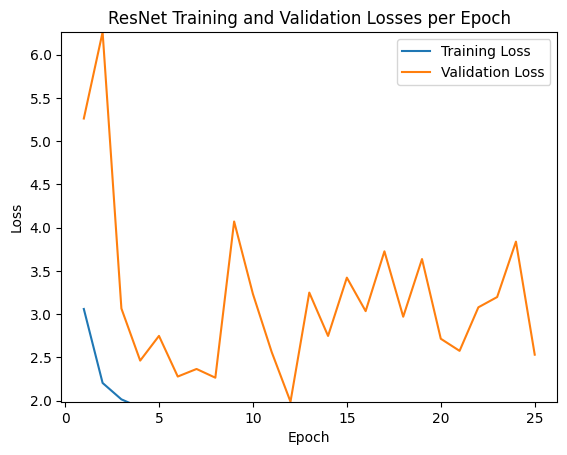

In [94]:
plot_losses_optical(optical_flow_model_result)

In [95]:
def plot_accuracies_optical(models_results):
    min_accuracy = float('inf')
    max_accuracy = float('-inf')

    for i, result in enumerate(models_results):
        _, training_accuracies, _, validation_accuracies = result
        min_accuracy = min(min_accuracy, min(training_accuracies), min(validation_accuracies))
        max_accuracy = max(max_accuracy, max(training_accuracies), max(validation_accuracies))

    for i, result in enumerate(models_results):
        model_name = type(models[i]).__name__
        training_accuracies, validation_accuracies = result[1], result[3]

        plt.figure()

        plt.plot(range(1, len(training_accuracies) + 1), training_accuracies, label='Training Accuracy')
        plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, label='Validation Accuracy')

        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'{model_name} Training and Validation Accuracies per Epoch')
        plt.legend()
        plt.ylim(min_accuracy, max_accuracy)  # Set the y-axis limits for consistency
        plt.show()

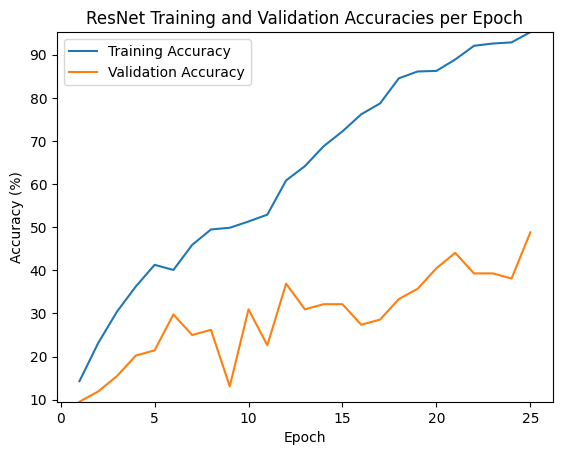

In [96]:
plot_accuracies_optical(optical_flow_model_result)

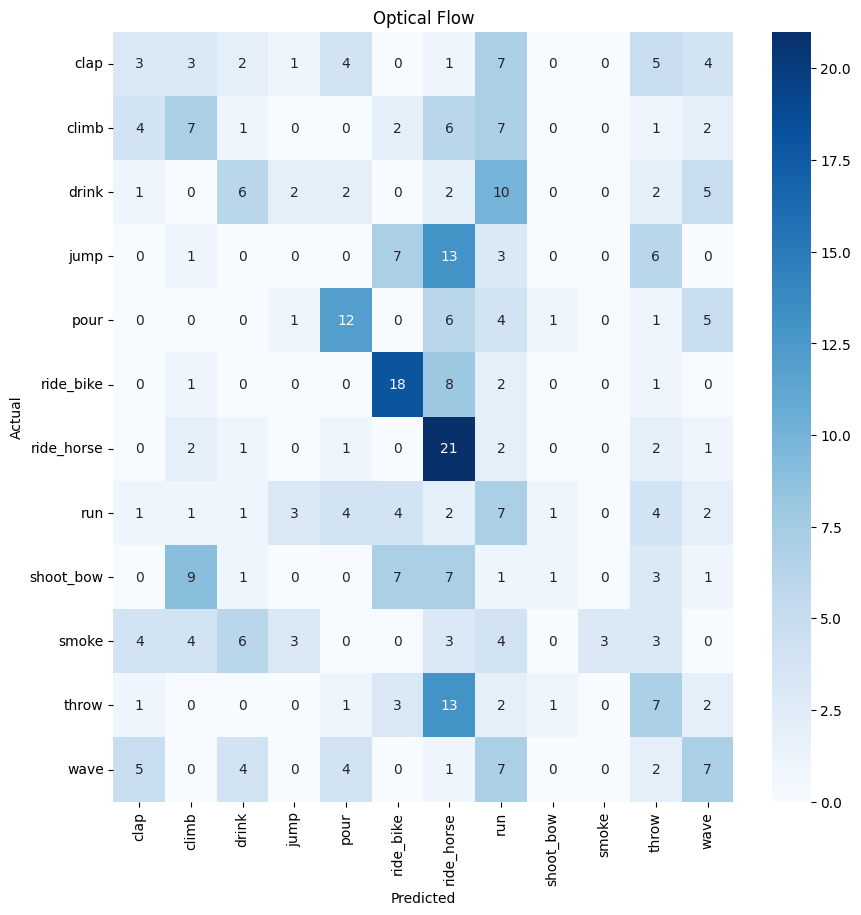

In [80]:
optical_flow_true_labels, optical_flow_predicted_labels = test_with_predictions(optical_flow_test_loader_hmdb, model, criterion, device)
create_confusion_matrix(optical_flow_true_labels, optical_flow_predicted_labels, "Optical Flow")

In [97]:
names = ["Task 1", "Task 2", "Task 3"]
models = [resnet_model, trained_resnet_model, model]

for model in models:
    torch.save({
            names[0]: models[0].state_dict(),
            names[1]: models[1].state_dict(),
            names[2]: models[2].state_dict()
           },"models.pth")